# Setup
Install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt):

In [ ]:
!git clone https://github.com/buckket/vlr-matchups
%cd vlr-matchups

!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
!pip install -q onnx onnxruntime

import torch
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Define streamer
Insert the name of a Twitch.tv streamer, who’s currently online, playing Valorant.

In [2]:
streamer_name = 'stewie2k' #@param {type:"string"}

# Inference
- Downloads the YOLOv5s model from PyTorch Hub
- Fetches the preview image of the selected stream
- Prepares the image and does the inference

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-27 Python-3.8.10 torch-1.13.1+cu116 CPU

Loading model/best.onnx for ONNX Runtime inference...
Adding AutoShape... 


  0%|          | 0.00/292k [00:00<?, ?B/s]

          xmin        ymin        xmax        ymax  confidence  class  \
0   489.845398   30.091105  530.280151   70.019653    0.961883     45   
1   357.967682   29.971706  398.097260   70.249939    0.957244     43   
2   424.293793   30.205727  464.077179   70.156136    0.957082     35   
3   292.069153   30.032267  332.063843   69.860176    0.954405     41   
4   374.139893  130.154129  414.784668  170.502701    0.953897     65   
5   226.012878   30.007154  266.264984   70.135658    0.953566     34   
6   309.177429  130.214325  349.270020  170.053558    0.950711     61   
7   242.966858  130.007751  283.368591  169.856689    0.941121     55   
8   110.989777  130.363907  151.026550  169.808701    0.935305     54   
9   177.047836  130.097443  217.275620  170.185089    0.930306     57   
10  591.894226   36.028133  612.999084   66.238754    0.919975      3   
11   26.658863  134.950684   48.153416  165.550720    0.881967      3   

              name  
0             sage  
1       

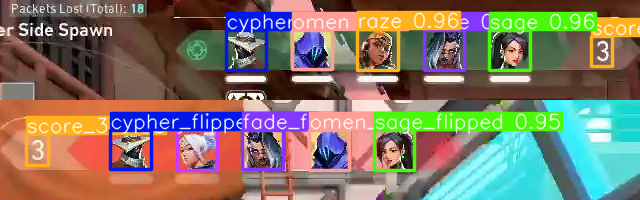

In [3]:
# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'model/best.onnx')

# Define image
print("Downloading screenshot of streamer: " + streamer_name)
url = "https://static-cdn.jtvnw.net/previews-ttv/live_user_{}-1920x1080.jpg".format(streamer_name)

# Download image
torch.hub.download_url_to_file(url, "image.jpg")

# Prepare image
img = cv2.imread("image.jpg")
m = np.zeros((640, 640, 3), dtype=np.uint8)
m[0:200, :, :3] = cv2.vconcat([img[0:100, 220:860], img[0:100, 1060:-220]])
img = m[:, :, ::-1]

# Inference
results = model(img)

print(results.pandas().xyxy[0])
cv2_imshow(np.squeeze(results.render())[:200, :, ::-1])